In [38]:
!pip install torch
!pip install torchvision
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torchvision
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\shura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\shura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.1.2%2Bcu118-cp311-cp311-win_amd64.whl (3.9 MB)
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 2.0 MB/s eta 0:22:54
     ---------------------------------------- 0.0/2.7 GB 2.8 MB/s eta 0:16:28
     ---------------------------------------- 0.0/2.7 GB 2.6 MB/s eta 0:17:22
     ---------------------------------------- 0.0/2.7 GB 1.8 MB/s eta 0:25:25
     ---------------------------------------- 0.0/2.7 GB 1.8 MB/s eta 0:25:00
     ---------------------------------------- 0.0/2.7 GB 1.8 MB/s eta 0:25:00
     ---------------------------------------- 0.0/2.7 GB 1.4 MB/s eta 0:32:55
     ---------------------------------------- 0.0/2.7 GB 1.4 MB/s eta 0:32:55
     ---------------------------------------- 0.0/2.7 GB 1.4 MB/s eta 0:32:55
     ---------------------------------------- 0.0/2.7 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)

     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:46
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:50
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:54
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:54
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:58
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:58
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:58
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:58
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:19:02
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:19:04
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:19:00
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/s eta 0:18:54
     ------------------- -------------------- 1.4/2.7 GB 1.2 MB/


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\shura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\shura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [76]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [77]:
# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
#image_datasets

In [78]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 1080, 'val': 200}


['daisy', 'dandelion']

In [79]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [80]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")


train Loss: 0.6708 Acc: 0.8065
val Loss: 0.0605 Acc: 0.9800
train Loss: 0.4632 Acc: 0.8444
val Loss: 0.0786 Acc: 0.9650
train Loss: 0.3742 Acc: 0.8611
val Loss: 0.2859 Acc: 0.9100
train Loss: 0.3234 Acc: 0.9000
val Loss: 0.0350 Acc: 0.9850
train Loss: 0.3164 Acc: 0.8889
val Loss: 0.0271 Acc: 0.9850
train Loss: 0.3127 Acc: 0.8898
val Loss: 0.0240 Acc: 0.9900
train Loss: 0.3340 Acc: 0.8806
val Loss: 0.0266 Acc: 0.9900
train Loss: 0.3124 Acc: 0.8731
val Loss: 0.0728 Acc: 0.9700
train Loss: 0.3119 Acc: 0.8963
val Loss: 0.0247 Acc: 0.9900
train Loss: 0.2702 Acc: 0.8944
val Loss: 0.0275 Acc: 0.9950
Training complete!


In [81]:

# Save the model
torch.save(model.state_dict(), 'flower_classification_model.pth')


In [67]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('flower_classification_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]


C:\Users\shura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [85]:
# Load and preprocess the unseen image
image_path = 'dataset/train/dandelion/2634665077_597910235f_m_jpg.rf.f9ab199b564e1a3773583a5a56a2afaa.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


In [86]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: dandelion


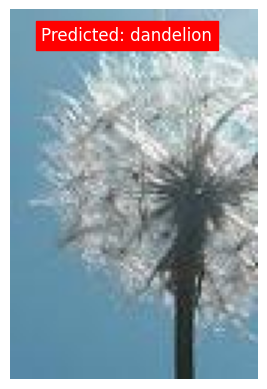

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()